In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("winequality_white.csv")

In [3]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.9892,3.33,0.39,12.8,8
1,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.9892,3.33,0.39,12.8,8
2,6.8,0.26,0.42,1.7,0.049,41.0,122.0,0.9930,3.47,0.48,10.5,8
3,6.7,0.23,0.31,2.1,0.046,30.0,96.0,0.9926,3.33,0.64,10.7,8
4,6.7,0.23,0.31,2.1,0.046,30.0,96.0,0.9926,3.33,0.64,10.7,8
5,5.2,0.44,0.04,1.4,0.036,43.0,119.0,0.9894,3.36,0.33,12.1,8
6,5.2,0.44,0.04,1.4,0.036,43.0,119.0,0.9894,3.36,0.33,12.1,8
7,6.8,0.53,0.35,3.8,0.034,26.0,109.0,0.9906,3.26,0.57,12.7,8
8,6.7,0.26,0.39,1.1,0.040,45.0,147.0,0.9935,3.32,0.58,9.6,8
9,7.0,0.24,0.36,2.8,0.034,22.0,112.0,0.9900,3.19,0.38,12.6,8


In [4]:
df.shape

(4873, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4873 entries, 0 to 4872
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4873 non-null   float64
 1   volatile acidity      4873 non-null   float64
 2   citric acid           4873 non-null   float64
 3   residual sugar        4873 non-null   float64
 4   chlorides             4873 non-null   float64
 5   free sulfur dioxide   4873 non-null   float64
 6   total sulfur dioxide  4873 non-null   float64
 7   density               4873 non-null   float64
 8   pH                    4873 non-null   float64
 9   sulphates             4873 non-null   float64
 10  alcohol               4873 non-null   float64
 11  quality               4873 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 457.0 KB


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = pd.read_csv("winequality_white.csv")  # Replace with your actual dataset

# Generate summary statistics
summary_table = data.describe()
print(summary_table)




       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4873.000000       4873.000000  4873.000000     4873.000000   
mean        6.851149          0.277995     0.334131        6.393741   
std         0.837109          0.100592     0.121189        5.072535   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4873.000000          4873.000000           4873.000000  4873.000000   
mean      0.045756            35.236097            138.251283     0.994026   
std       0.021695            16.445156             42.011360     0.002990   
min       0.009000             2.000000         

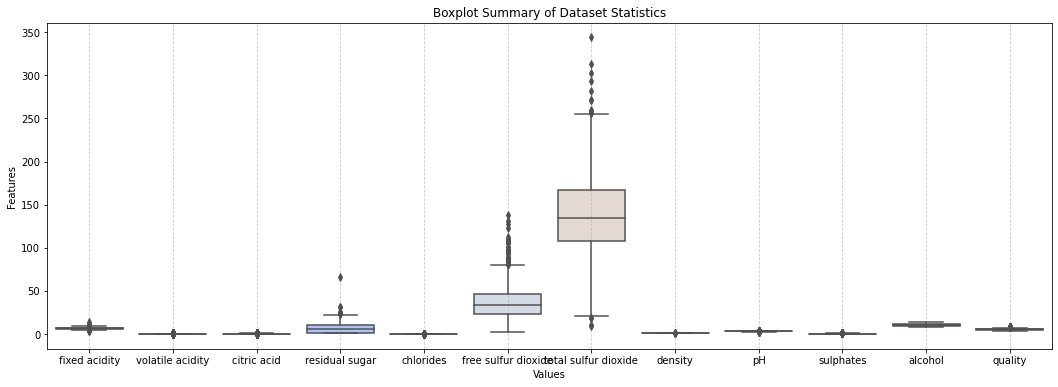

In [7]:
# Set the figure size
plt.figure(figsize=(18, 6))

# Create a boxplot for all numerical columns
sns.boxplot(data=data, orient="v", palette="coolwarm")

# Set title and labels
plt.title("Boxplot Summary of Dataset Statistics")
plt.xlabel("Values")
plt.ylabel("Features")
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
# Split data into train and test sets
X = df.drop(columns=["quality"])
y = df["quality"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
X_train.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
3505,6.7,0.50,0.63,13.4,0.078,81.0,238.0,0.99880,3.08,0.44,9.2
4109,8.2,0.52,0.34,1.2,0.042,18.0,167.0,0.99366,3.24,0.39,10.6
2213,5.8,0.13,0.26,5.1,0.039,19.0,103.0,0.99478,3.36,0.47,9.3
4168,6.9,0.40,0.42,6.2,0.066,41.0,176.0,0.99552,3.12,0.54,9.4
2011,7.2,0.39,0.54,1.4,0.157,34.0,132.0,0.99449,3.11,0.53,9.0


In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Define scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'weighted_precision': make_scorer(precision_score, average='weighted'),
    'macro_recall': make_scorer(recall_score, average='macro'),
    'f1_score': make_scorer(f1_score, average='weighted')
}

# Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_scores = cross_validate(dt_clf, X_train, y_train, cv=5, scoring=scoring)

# SVM Classifier
svm_clf = SVC(kernel='rbf', random_state=42)
svm_scores = cross_validate(svm_clf, X_train, y_train, cv=5, scoring=scoring)

# Function to print cross-validation results
def print_cv_results(model_name, scores):
    print(f"--- {model_name} Cross-Validation Results ---")
    print(f"Accuracy: {scores['test_accuracy'].mean():.4f}")
    print(f"Weighted Precision: {scores['test_weighted_precision'].mean():.4f}")
    print(f"Macro Recall: {scores['test_macro_recall'].mean():.4f}")
    print(f"F1 Score: {scores['test_f1_score'].mean():.4f}")
    print()

# Print results for each model
print_cv_results("Decision Tree", dt_scores)
print_cv_results("SVM", svm_scores)

/project/dsi/apps/anaconda3/python-3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/project/dsi/apps/anaconda3/python-3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/project/dsi/apps/anaconda3/python-3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/project/dsi/apps/anac

--- Decision Tree Cross-Validation Results ---
Accuracy: 0.5695
Weighted Precision: 0.5712
Macro Recall: 0.4927
F1 Score: 0.5698

--- SVM Cross-Validation Results ---
Accuracy: 0.4507
Weighted Precision: 0.3119
Macro Recall: 0.2010
F1 Score: 0.2979



/project/dsi/apps/anaconda3/python-3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=dt_clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_}")

# Train the best model on the full training set
best_dt_clf = grid_search.best_estimator_
best_dt_clf.fit(X_train, y_train)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.5725986636384582


DecisionTreeClassifier(max_depth=20, random_state=42)

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score


# SVM with MinMaxScaler
svm_pipeline_scaled = make_pipeline(MinMaxScaler(), SVC(kernel='rbf', random_state=42))
svm_scaled_scores = cross_val_score(svm_pipeline_scaled, X_train, y_train, cv=5, scoring='accuracy')
print(f"SVM with MinMaxScaler Cross-Validation Accuracy: {svm_scaled_scores.mean()}")

# SVM with PCA
svm_pipeline_pca = make_pipeline(PCA(n_components=5), SVC(kernel='rbf', random_state=42))
svm_pca_scores = cross_val_score(svm_pipeline_pca, X_train, y_train, cv=5, scoring='accuracy')
print(f"SVM with PCA Cross-Validation Accuracy: {svm_pca_scores.mean()}")

SVM with MinMaxScaler Cross-Validation Accuracy: 0.5533636154175307
SVM with PCA Cross-Validation Accuracy: 0.45946775945492246


In [15]:
from sklearn.dummy import DummyClassifier

# Dummy Classifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_accuracy = dummy_clf.score(X_test, y_test)
print(f"Dummy Classifier Accuracy: {dummy_accuracy}")

# Evaluate the best Decision Tree model
dt_accuracy = best_dt_clf.score(X_test, y_test)
print(f"Best Decision Tree Accuracy: {dt_accuracy}")

# Evaluate the best SVM model (with scaling)
svm_pipeline_scaled.fit(X_train, y_train)
svm_scaled_accuracy = svm_pipeline_scaled.score(X_test, y_test)
print(f"SVM with MinMaxScaler Accuracy: {svm_scaled_accuracy}")

Dummy Classifier Accuracy: 0.441025641025641
Best Decision Tree Accuracy: 0.6051282051282051
SVM with MinMaxScaler Accuracy: 0.5712820512820512


## Discussion:

Initially, the Decision Tree classifier outperformed SVM. After applying GridSearchCV, the Decision Tree model improved further. Similarly, using MinMaxScaler enhanced SVM's performance. Testing on the test data showed that both the Decision Tree and SVM performed significantly better than the Dummy Classifier. However, overall, the Decision Tree remained the best-performing model among them.